<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Geometria obliczeniowa cz. 1
</div>

1. [Zadanie 1. Generowanie danych z szumem Gaussa](#zad1)
2. [Zadanie 2. Regresja liniowa i wielomianowa n-go stopnia - metoda najmniejszych kwadratów](#zad2)
2. [Zadanie 3. Wpasowanie płaszczyzny - metoda najmniejszych kwadratów](#zad3)

In [3]:
# import bibliotek i ustawienia wykresów
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Polygon
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-.'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Wyświetlanie wykresów
# metoda magiczna do wyświetlania wykresów statyczny w komórce
%matplotlib inline 
# metoda magiczna do wyświetlania wykresów interaktywnych, 
#%matplotlib notebook 

## 1.  Generowanie danych z szumem Gaussa <a name="zad1"></a>

Mając daną funkcję:
$$
y =  2x + 5x^3
$$
Dla danych wartości x wygeneruj watrości y charakteryzujące się szumem Gaussowskim.
Nastepnie narysuj wartości na wykresie.


Do wygenerowania szumu Gausowskiego należy wykoskorzystać z funkcję biblioteki numpy:
`random.normal(loc=0.0, scale=1.0, size=None)` - tworzy tablicę o określonym kształcie i wypełnia ją losowymi wartościami, co w rzeczywistości jest częścią rozkładu normalnego (gaussowskiego)
Generowanie danych o roskładzie normalnym (Gaussowskim), gdzie:
+ loc - Średnia (“środek”) rozkładu.
+ scale - odchylenie standarcowe (spread or “width”) of the distribution. Must be non-negative.
+ size - 

Do wygenerowania danych, przygotuj dwie funkcje pomocnicze:

**initialize_y()**
- INPUT: 
    + **x** - wartości x [tablica numpy]
    + **coef** - wektor współczynników wielomianu [tablica numpy]
    
- OUTPUT:
    + **y** wartości funkcji dal danych x i współczynników wielomianu

**generate()**
- INPUT: 
    + **x** - wartości x [tablica numpy]
    + **coef** - wektor współczynników wielomianu [tablica numpy]
    + **noise** - wektor współczynników wielomianu [tablica numpy]
    
- OUTPUT:
    + **y** wartości funkcji dal danych x z dodanym szumem z Gaussowskim (szum charakretyzujący się rozkładem Gaussa - $N(0, noise)$)

In [4]:
def initialize_y(x, coef):
    # coef jest wektorem współczynników wielomianu
    y = np.zeros(len(x))
    for i in range(len(x)):
        temp = 0
        for j in range(len(coef)):
            temp += coef[j]*(x[i]**j)
        y[i] = temp
    return y

def generate(x, coef, noise):
    y = initialize_y(x, coef)
    added_noise = np.random.normal(0, noise, len(x))
    y = y + added_noise
    return y

In [5]:
# dane x i współczynniki podanego w zadaniu wielomianu: 2x-5x^3
y_coef = np.array([0, 2, 0, -5])      # wielomianem jest funkcja: 2x-5x^3 -> 0 + 2x + 0x^2 + 5x^3

# generowanie punktów funkcji bez szumu (wariancja 10001)
x = np.linspace(-20, 20, 100)         # wygenerowanie 100 danych z przedziału (-20:20)
y = generate(x, y_coef, 10000)        # z przypadkowym szumem gaussowskim o wariancji 10001

# generowanie punktów funkcji bez szumu (wariancja 0)  dla porównania na wykresie
x_exact = np.linspace(-20, 20, 100)
y_exact = generate(x_exact, y_coef, 0) # z przypadkowym szumem gaussowskim o wariancji 0

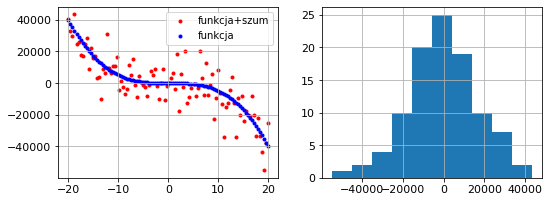

In [6]:
xx = 22/2.54; yy = 8/2.54
fig, [ax1, ax2] =  plt.subplots(nrows=1, ncols=2, figsize=(xx, yy))

# wykres punktów funkcji f(x)
ax1.scatter(x, y, marker = '.', color = 'red', label ='funkcja+szum') 
ax1.scatter(x_exact, y_exact, marker = '.', color = 'blue', label ='funkcja')
ax1.legend()
# histogram rozkładu
ax2.hist(y, 10)    
plt.show()
# plt.savefig('name.format') # zapisanie wykresu

## 2.  Regresja liniowa i wielomianowa n-go stopnia - metoda najmniejszych kwadratów <a name="zad2"></a>

Dla danych wartości x i y wygenerowanych w poprzednim zadaniu, policz:
- współczynniki oraz wielomianu n-go stopnia,
- wartości y wpasowanego wielomianu,
- residua,
wyniki należy zaprezentować na wykresach.

Aby wyznaczyć parametry wielomianu najlepiej  wpasowanego w serię punktów, można skorzystać z **metody najmniejszych kwadratów** do obliczenia do wyznaczenia współczynników tego wielomianu. Metoda najmniejszych kwadratów jest optymalną metoda estymacji co oznacza celu zminimalizowania odległości między obserwacjami i wynikową krzywą nazywaną krzywa regresji (linią trendu). Zakładamy, że rzeczywistym modelem dla wybranej serii obserwacji jest wielomian n-go stopnia.

$$
y_{n} = a_{0} + a_{1}x_{n} + a_{2}x_{k}^2 + a_{3}x_{k}^3  + ... + a_{n}x_{k}^{n}
$$

Model funkcjonalny tego wielomianu można zapisać:
$$
\mathbf{y} = A \mathbf{x}
$$

W zapisie macierzowym nasze równanie można zapisać następująco:
$$
\mathbf{y} = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\  
    \vdots \\ 
    y_{n} \\
\end{bmatrix}
;
A = 
\begin{bmatrix}
    1		& x_{1} 	&  x_{1}^{2} 	& ... & x_{1}^{n}\\
    1		& x_{2} 	&  x_{2}^{2} 	& ... & x_{2}^{n}\\
    1		& x_{3}		&  x_{3}^{2} 	& ... & x_{3}^{n}\\  
    \vdots	& \vdots 	& \vdots    	& ... &  \\ 
    1		& x_{k} 	& x_{k}^{2} 	& ... & x_{k}^{n} \\
\end{bmatrix}
;
\mathbf{x} = 
\begin{bmatrix}
    a_{1} \\
    a_{2} \\
    a_{3} \\  
    \vdots \\ 
    a_{n} \\
\end{bmatrix}
$$

# -----------------------------------------------------------------------------------------------------------
**Metoda najmniejszych kwadratów**
Niech $y \approx Ax$,  będzie liniowym układem równań gdzie $A$ jest macierza $m \times n$ i $rank(A) = n$. Wtedy rozwiązanie tego układu metodą najmniejszych kwadratów  definiuje się jako:
$$
    \hat{x} = arg \quad \underset{x \in R}{min} (y - Ax)^T (y - Ax)
$$

Różnica między $y$, a $\hat{y}=A\hat{x}̂$ nazywana jest wektorem residułów $\hat{e} = y- A\hat{x}̂$.
Jego kwadrat  $||\hat{e}^2||= \hat{e}^T \hat{e}$ jest skalarną miarą niezgodności systemu liniowego.
Rozwiązanie najmniejszych kwadratów można obliczyć jako:
$$
\hat{\mathbf{x}} = (A^{T} A)^{-1} A^{T} \mathbf{y}
$$
# -----------------------------------------------------------------------------------------------------------


**Wektor estymowany współczynników** nalepiej dopadowanej krzywej wielomianu n-go z wykorzystaniem metody najmniejszych kwadratów, wyznaczamy jako:

$$
\hat{\mathbf{x}} = (A^{T} A)^{-1} A^{T} \mathbf{y}
$$

Następnie równanie nalepiej dopasowanej krzywej wielomianu (w wyniku estymacji metodą najmniejszych kwadratów) do obserwacji (ang. *best fit curve*) można zapisać jako:
$$
\hat{\mathbf{y}} = A \hat{\mathbf{x}}
$$

**Wektor residuów** obliczamy następująco:
$$
\hat{e} = \mathbf{y} - \hat{\mathbf{y}} 
$$

In [7]:
from numpy.linalg import inv
def fit_poly(x, y, degree = 3):  
    # A macierz współczynników przy niewiadomych, dla wielomianów n-go stopnia
    A = [] 
    for t in x:
        if degree == 1:
            A.append([1, t])
        if degree == 2:
            A.append([1, t, t**2])
        if degree == 3:
            A.append([1, t, t**2, t**3])
    A = np.array(A) # convert list of list to array
    
    # automatyczne wyznaczenie A macierz współczynników przy niewiadomych, dla wielomianów n-go stopnia
    A = np.zeros((len(x), 0))
    for i in range(0, degree +1):
        A = np.column_stack((A, x**i))
    
    
    y = np.array(y).T

    # ---LSM Estimation: coefficient of curve fitting
    x  = inv(A.T @ A) @ (A.T @ y)       # współczynniki [a,b,c] = x
    
    # ---Estimation: curve of fitting
    y_estimated = A @ x   
    
    # ---Compute the residual values as a vector of signed numbers:
    y_res = y.T - y_estimated
    return(x, y_res, y_estimated)


#print(type(x),type(y), np.shape(x), np.shape(y))
coeff, y_res1, y_estimated1 = fit_poly(x, y, degree = 1)#1szy stopeń
coeff, y_res2, y_estimated3 = fit_poly(x, y, degree = 3)
coeff, y_res20, y_estimated20 = fit_poly(x, y, degree = 20)

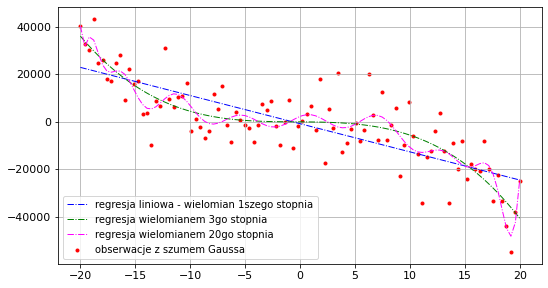

In [8]:
xx = 22/2.54; yy = 12/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

# wykres punktów funkcji f(x)
ax.scatter(x, y, marker = '.', color = 'red', label ='obserwacje z szumem Gaussa') 
ax.plot(x, y_estimated1, color = 'blue', label ='regresja liniowa - wielomian 1szego stopnia')
ax.plot(x, y_estimated3, color = 'green', label ='regresja wielomianem 3go stopnia')
ax.plot(x, y_estimated20, color = 'magenta', label ='regresja wielomianem 20go stopnia')
ax.legend()
 
plt.show()

## 3. Wpasowanie płaszczyzny - metoda najmniejszych kwadratów <a name="zad3"></a>
Dla danych współrzędnych punktów x, y, z wyznacz parametry wpasowanej płaszczyzny z użyciem metody najmniejszych kwadratów. Wyniki punktów oraz wpasowanej płaszczyzny zaprezentuj na wykresie.

Aby wpasować płaszczyznę w zestaw współrzędnych $x, y, z$, można skorzystać z metody
najmniejszych kwadratów w celu znalezienia współczynników płaszczyzny najlepiej dopasowanej.
**Należy, zauważyć, że poniżej zaprezentowana metoda wpasowania płaszczyny rozwiązuje problem poprzez minimalizację odległości pionowej (tj.: z), a nie odległość prostopadłej do płaszczyzny.**



Równanie płaszczyzny ma nastepującą postać:
$$
ax + by + c = z
$$
czyli:
$$
Ax = y
$$

$$
\begin{bmatrix}
x_0  & y_0 &  1  \\
x_1  & y_1 &  1   \\
\vdots  & \vdots    &  \vdots \\
x_n  & y_n &  1   \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
= 
\begin{bmatrix}
z_0   \\
z_1    \\
\vdots   \\
z_n \\
\end{bmatrix}
$$

Teraz należy wyznaczyć wektor niewiadomych x, który zawiera współczynniki najlepiej dopasowanej prostej. Ale ponieważ (zakładamy) że mamy więcej niż 3 punkty, system jest układem nadokreślonym (ang. \emph{overdetermined}), więc należy użyć  pseudoodwrotności: $A^+ =(A^TA)^{−1} A^T$. Więc rozwiązanie można zapisac jako:
$$
x =\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix} = (A^T A)^{-1} A^T y
$$

In [13]:
# Dane do zadania:
N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 1
TARGET_OFFSET  = 10
EXTENTS = 5
NOISE = 5

# create random data
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + 
              ys[i]*TARGET_y_SLOPE + 
              TARGET_OFFSET + np.random.normal(scale=NOISE))

Rozwiązanie: 2.0825x, 1.3901y, 11.4811z
Residua: [-8.636  2.156  5.148 -0.355  0.873 -2.312  3.574 10.090 -5.178 -5.360]


<IPython.core.display.Javascript object>


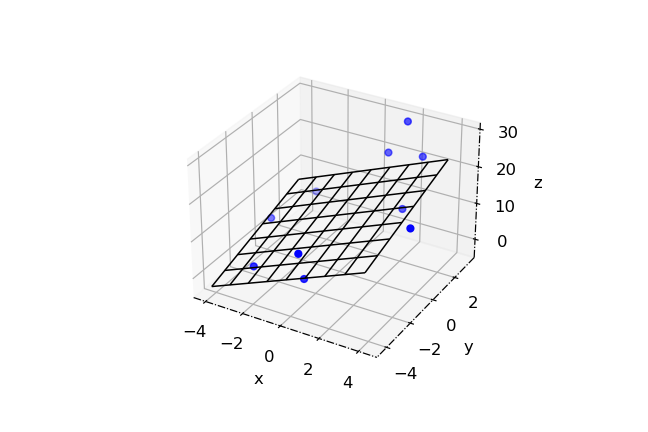

(-4.047153691881984, 4.706113933014519)


In [14]:
%matplotlib notebook
from numpy.linalg import inv, norm
from mpl_toolkits.mplot3d import Axes3D

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
    
b = np.array(tmp_b).T
A = np.array(tmp_A)
fit = inv(A.T @ A) @ A.T @ b
errors = b - A @ fit
residual = norm(errors)

print(f"Rozwiązanie: {fit[0]:.4f}x, {fit[1]:.4f}y, {fit[2]:.4f}z")
print(f"Residua: {np.array2string(errors, precision=3, floatmode='fixed')}")

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')


# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim)
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]), np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()